# 1. 神经网络

① 把网络结构放在Sequential里面，好处就是代码写起来比较简介、易懂。

② 可以根据神经网络每层的尺寸，根据下图的公式计算出神经网络中的参数。

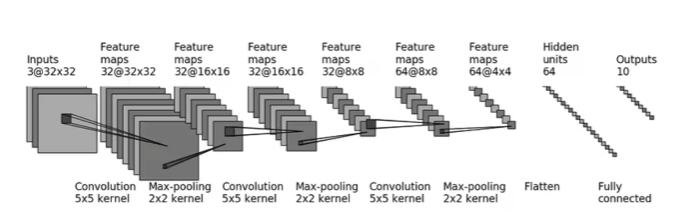

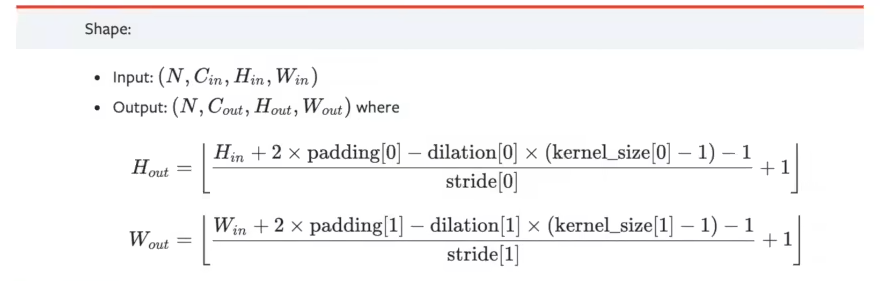

# 2. 搭建神经网络

In [1]:
import torch
import torchvision
from torch import nn 
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.conv1 = Conv2d(3,32,5,padding=2)
        self.maxpool1 = MaxPool2d(2)
        self.cov2 = Conv2d(32,32,5,padding=2)
        self.maxpool2 = MaxPool2d(2)
        self.conv3 = Conv2d(32,64,5,padding=2)
        self.maxpool3 = MaxPool2d(2)
        self.flatten = Flatten()
        self.linear1 = Linear(1024,64)
        self.Linear2 = Linear(64,10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.maxpool3(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.Linear2(x)
        return x

tudui = Tudui()
print(tudui)

Tudui(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cov2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=1024, out_features=64, bias=True)
  (Linear2): Linear(in_features=64, out_features=10, bias=True)
)


# 3. 神经网络输入数据

In [2]:
import torch
import torchvision
from torch import nn 
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.conv1 = Conv2d(3,32,5,padding=2)
        self.maxpool1 = MaxPool2d(2)
        self.conv2 = Conv2d(32,32,5,padding=2)
        self.maxpool2 = MaxPool2d(2)
        self.conv3 = Conv2d(32,64,5,padding=2)
        self.maxpool3 = MaxPool2d(2)
        self.flatten = Flatten()
        self.linear1 = Linear(1024,64)
        self.Linear2 = Linear(64,10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.maxpool3(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.Linear2(x)
        return x

tudui = Tudui()
input = torch.ones((64,3,32,32))
output = tudui(input)
print(output.shape)

torch.Size([64, 10])


# 4. Sequential神经网络

In [3]:
import torch
import torchvision
from torch import nn 
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear, Sequential

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = Sequential(
            Conv2d(3,32,5,padding=2),
            MaxPool2d(2),
            Conv2d(32,32,5,padding=2),
            MaxPool2d(2),
            Conv2d(32,64,5,padding=2),
            MaxPool2d(2),
            Flatten(),
            Linear(1024,64),
            Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x

tudui = Tudui()
input = torch.ones((64,3,32,32))
output = tudui(input)
print(output.shape)

torch.Size([64, 10])


# 4. Tensorboard显示网络

In [4]:
import torch
import torchvision
from torch import nn 
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear, Sequential
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       
dataloader = DataLoader(dataset, batch_size=64,drop_last=True)

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = Sequential(
            Conv2d(3,32,5,padding=2),
            MaxPool2d(2),
            Conv2d(32,32,5,padding=2),
            MaxPool2d(2),
            Conv2d(32,64,5,padding=2),
            MaxPool2d(2),
            Flatten(),
            Linear(1024,64),
            Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x

tudui = Tudui()
writer = SummaryWriter("logs")

tudui = Tudui()
input = torch.ones((64,3,32,32))
output = tudui(input)
print(output.shape)

writer.add_graph(tudui, input)
writer.close()

Files already downloaded and verified
torch.Size([64, 10])


① 在 Anaconda 终端里面，激活py3.6.3环境，再输入 tensorboard --logdir=C:\Users\wangy\Desktop\03CV\logs 命令，将网址赋值浏览器的网址栏，回车，即可查看tensorboard显示日志情况。

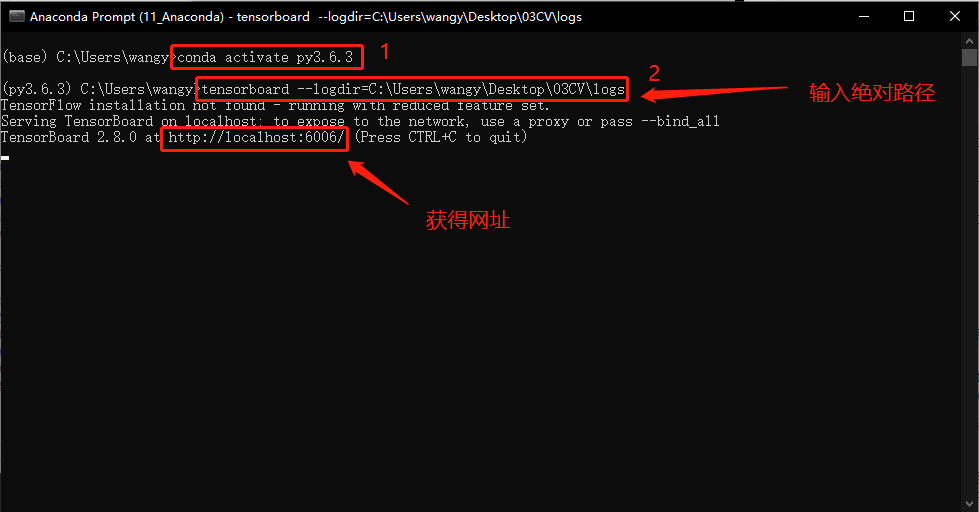

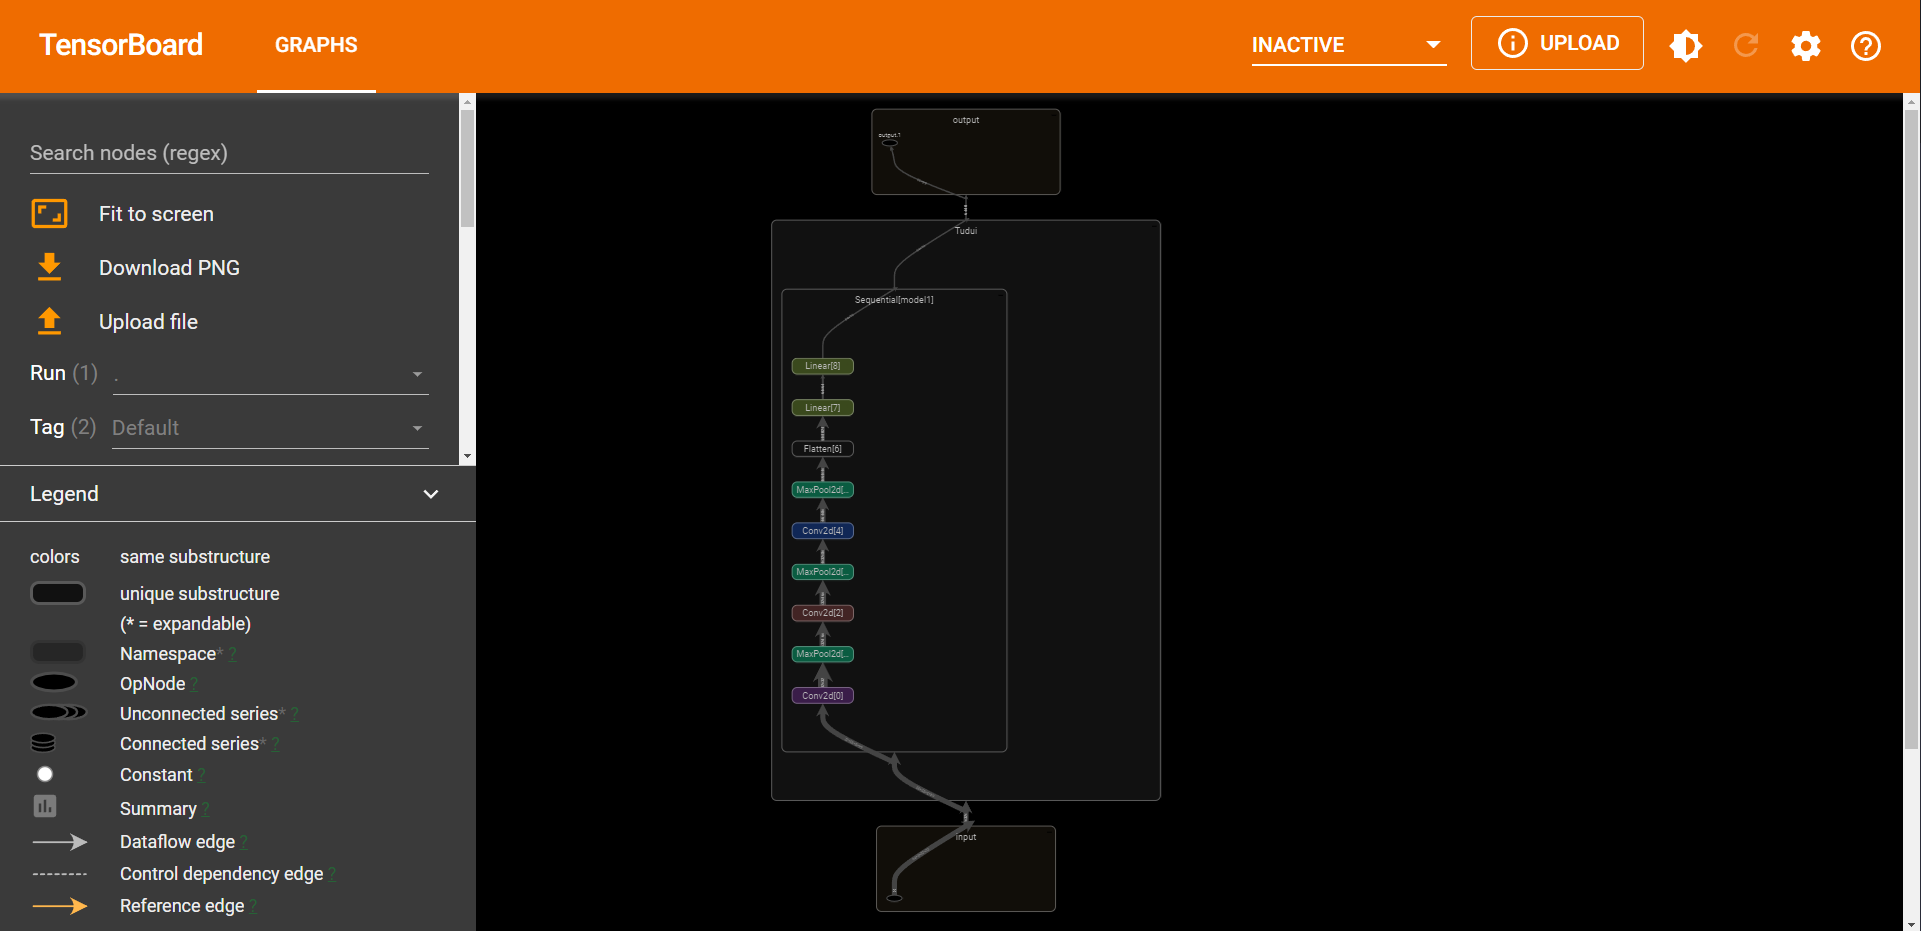